# Car Body Type Classification - EAD

### Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [26]:
dataDir = 'data'
csv_file = 'data/stanford_cars_type.csv'

### Definition of functions

In [30]:
def loadImage(imageDir, new=True):
    if (new): 
        csv_file = 'new_data/new_stanford_cars_type.csv'
    else:
        csv_file = 'data/stanford_cars_type.csv'

    img_folder = f'new_data/{imageDir}'
    data_csv = pd.read_csv(csv_file)
    images_tab = []
    labels_string = []

    for index, row in data_csv.iterrows():
        filename = row['file_name']
        category = row['car_type']

        image_path = os.path.join(img_folder, filename)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images_tab.append(image)
        labels_string.append(category)
    images = np.array(images_tab)
    return (images,np.array(labels_string))

def encodeLabel(labels_s):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels_s)
    return (labels_encoded, label_encoder)

def preprocessImages(images):
    preprocessed_images = []
    for image in images:
        equalized_image = cv2.equalizeHist(np.uint8(image))
        normalized_image = equalized_image / 255.0
        preprocessed_images.append(normalized_image)
    preprocessed_images = np.array(preprocessed_images)
    return preprocessed_images

def labelsPlot(labels_string):
    # Zliczenie etykiet
    label_counts = Counter(labels_string)

    print(label_counts)

    # Rozpakowanie nazw etykiet i ich liczności do wykresu słupkowego
    labels, counts = zip(*label_counts.items())

    # Generowanie wykresu słupkowego
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Klasy etykiet')
    plt.ylabel('Liczba obrazów')
    plt.title('Rozkład klas etykiet')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

def resizeAndSaveImages(input_folder, output_folder, target_size=(255, 255)):
    output_folder = f'new_data/{output_folder}'
    input_folder = f'new_data/{input_folder}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, target_size)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_image)  

def generateFromOriginalImages(outputFlder, newSize=(256,256)):
    main_data_folder = f'{dataDir}/stanford_cars_type'

    output_folder = f'new_data/{outputFlder}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for label in os.listdir(main_data_folder):
        label_folder = os.path.join(main_data_folder, label)
        
        for image_file in os.listdir(label_folder):
            image_path = os.path.join(label_folder, image_file)

            # Wyodrębnij tylko cyfry z początku nazwy
            numeric_prefix = re.match(r'^\d+', image_file).group()

            # Wczytaj obraz za pomocą OpenCV
            image = cv2.imread(image_path)

            # Przeskaluj obraz do nowego wymiaru (255x255) i zamień na skalę szarości
            image = cv2.resize(image, newSize)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Nazwa nowego pliku
            new_filename = f'{numeric_prefix}.jpg'
            new_image_path = os.path.join(output_folder, new_filename)

            # Zapisz przetworzony obraz
            cv2.imwrite(new_image_path, image)

### Process images from RGB to Gray and resize

In [31]:
# generateFromOriginalImages('processed')
resizeAndSaveImages('processed','64x64',(64,64))

### Load Images

Counter({'Sedan': 1907, 'Van': 1513, 'SUV': 1437, 'Coupe': 1088, 'Convertible': 1036})


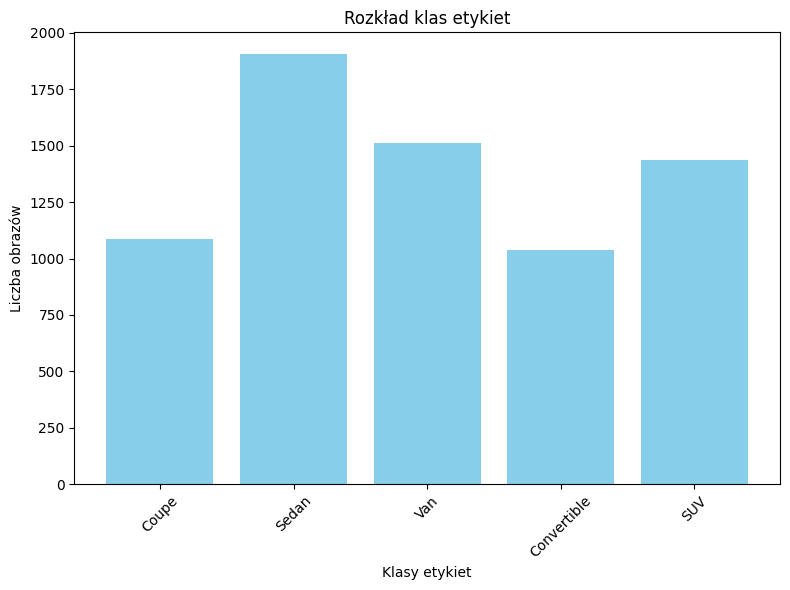

(6981,)
(6981,)


In [34]:
images, labels = loadImage('64x64')
labelsPlot(labels)
labels_encoded, labels_encoder = encodeLabel(labels)
print(labels_encoded.shape)
print(images.shape)

   Unnamed: 0  file_name  car_code                             car_name  \
0           0  00001.jpg        14                  Audi TTS Coupe 2012   
1           1  00002.jpg         3                  Acura TL Sedan 2012   
2           2  00003.jpg        91           Dodge Dakota Club Cab 2007   
3           3  00004.jpg       134     Hyundai Sonata Hybrid Sedan 2012   
4           4  00005.jpg       106  Ford F-450 Super Duty Crew Cab 2012   

     brand car_type                                   new_filename  
0     Audi    Coupe                  00001_Audi TTS Coupe 2012.jpg  
1    Acura    Sedan                  00002_Acura TL Sedan 2012.jpg  
2    Dodge      Cab           00003_Dodge Dakota Club Cab 2007.jpg  
3  Hyundai    Sedan     00004_Hyundai Sonata Hybrid Sedan 2012.jpg  
4     Ford      Cab  00005_Ford F-450 Super Duty Crew Cab 2012.jpg  
Counter({'Sedan': 1907, 'SUV': 1437, 'Coupe': 1088, 'Convertible': 1036, 'Cab': 719, 'Other': 609, 'Hatchback': 554, 'Wagon': 291, 'Van

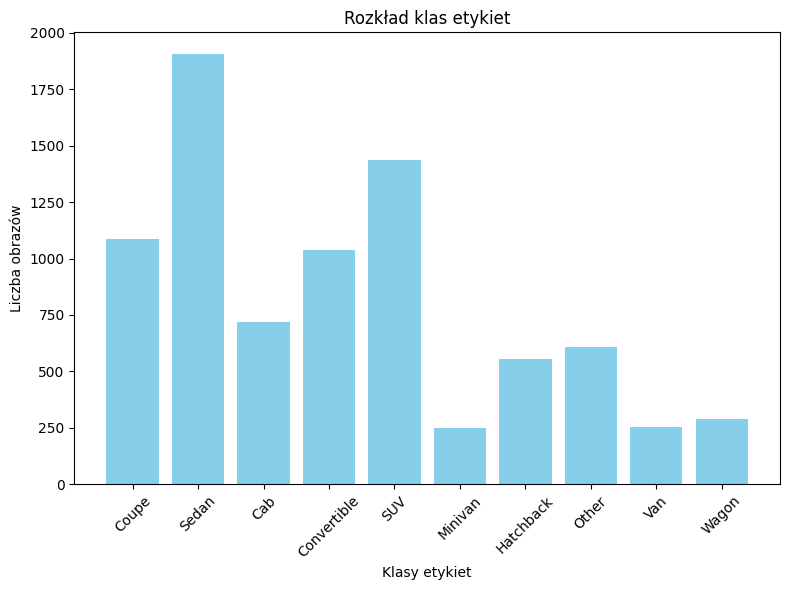

Counter({'Sedan': 1907, 'Van': 1513, 'SUV': 1437, 'Coupe': 1088, 'Convertible': 1036})


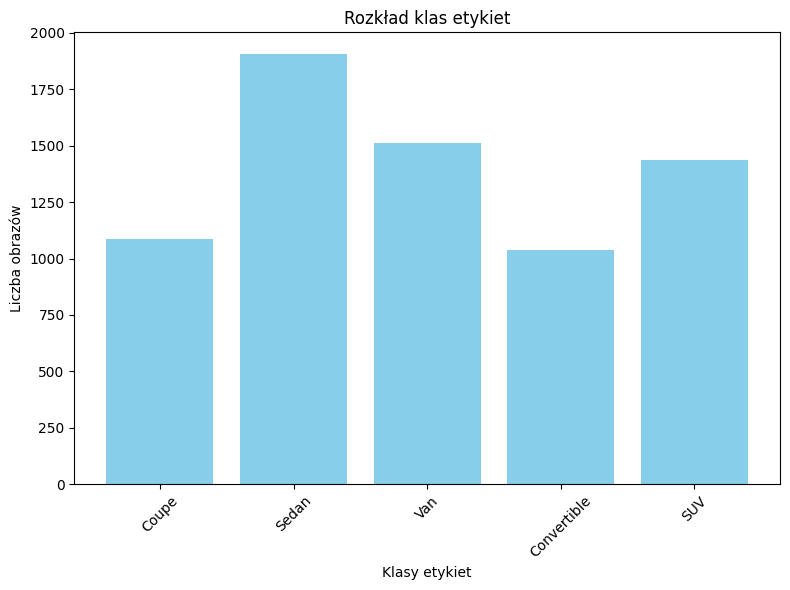

In [35]:
data_csv = pd.read_csv(csv_file)
print(data_csv.head())

labelsPlot(data_csv['car_type'])
data_csv['car_type'].replace('Minivan', 'Van', inplace=True)

data_csv['car_type'].replace('Wagon', 'Van', inplace=True)

data_csv['car_type'].replace('Cab', 'Van', inplace=True)

data_csv = data_csv[~data_csv['car_type'].isin(['Other', 'Hatchback'])]

labelsPlot(data_csv['car_type'])

data_csv.to_csv('new_data/new_stanford_cars_type.csv', index=False)

### Generate Images